# Exercise 15 - More plotting
*Andrew Valentine, Louis Moresi, louis.moresi@anu.edu.au*

In this exercise, we will meet some more advanced features of Python's plotting capabilities.


In `matplotlib`, a `figure` represents the entire 'page' you can draw on, and can contain multiple `axes`, each of which contains a single plot. This allows you to build up complex, multi-panel figures.

To understand how this works, it's useful to go to the very-basics, and manually create a figure and an axis to make a plot in.

For example:

```python
fig = plt.figure()  # creates a new figure, with no axes
ax = fig.add_axes([.1, .1, .8, .8])  # creates an axis at the specified coordinates 
# the coordinates are in the form [left, bottom, width, height].
# Units are fractions of the total figure size (i.e. 0.5 is the centre of the figure).

ax.plot(x, y)  # draws a plot on the axis
```

**&#10148; Make a new figure containing two axes - one in the upper right quarter, and one in the lower left quarter.**

In [ ]:
# Try it here!

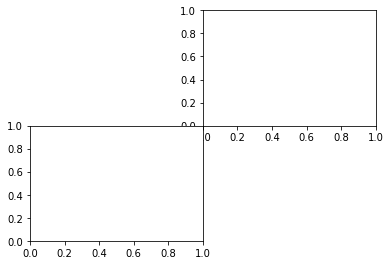

In [19]:
fig = plt.figure()
ax1 = fig.add_axes([.5, .5, .4, .4])
ax2 = fig.add_axes([.1, .1, .4, .4])

This is straightforward, but can get laborious if you're making a plot with lots of panels. Luckily, `matplotlib` has a number of built-in functions that make creating multi-plot figures very easy.

For simple cases where you want an $N \times M$ grid of plots, you can use `fig.add_subplot()`:
```python
fig = plt.figure()
fig.add_subplot(nrows, ncols, index)
```
where `nrows` is the number of 'rows' in the grid, `ncols` is the number of columns, and `index` is a number between 1 and `nrows*ncols` which selects which of the panels we wish to create. Typically, one will call `fig.add_subplot()` several times, with the same `nrows` and `ncols`, but a different `index` in each case. Having switched to a panel, we can then issue plotting commands for that panel.

As a shorthand, if `nrows`, `ncols` and `index` are all single-digit numbers, you can also call `fig.add_subplot(nci)` where `nci` is `nrows`, `ncols` and `index` concatenated into a 3-digit number. In other words, `fig.add_subplot(3,2,5)` is exactly the same as `fig.add_subplot(325)`.

For example:
```python
fig = plt.figure(figsize=(12,3))
xx = np.linspace(0,1,100)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(np.sin(5*np.pi*xx),'r')
ax2 = fig.add_subplot(122)
ax2.plot(np.cos(5*np.pi*xx),'b')
```
Also notice here that we have passed `figsize = (xsize, ysize)` to `plt.figure()`, to control the size (and more importantly, shape) of the figure we have created. *Note: figure sizes are in inches.*

**&#10148; Use `fig.add_subplot()` to make a new figure with the same layout as the one above.**

In [ ]:
# Try it here!

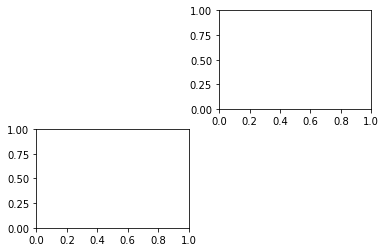

In [30]:
fig = plt.figure()
fig.add_subplot(2, 2, 2)
fig.add_subplot(2, 2, 3)

Notice how `matplotlib` has put some space between the axis automatically here, making for a nicer-looking plot.

Alternatively, you can create all the `axes` you need when you create the figure, using `plt.subplots(nrows, ncol)`. This returns two objects - a `figure`, and an array of `axes` objects. For example:
```python
fig, axs = plt.subplots(2, 2, figsize=[6, 6])
```
will create a figure object (`fig`), and a (2x2) array of `axes` (`axs`).

This can be really useful if you're creating plots programmatically, as it creates all the axes at the start, and you can them iterate through them. For example:

```python
fig, axs = plt.subplots(2, 2, figsize=[6, 6])

x = np.linspace(0, 10, 100)
for i, ax in enumerate(axs.flatten()):
    ax.plot(x, x**i)
```
Note the use of `.flatten()`, to convert a 2x2 array into a 1D array, which is more suitable for iteration.

**&#10148; Try making this plot.**

In [ ]:
# Try it here!

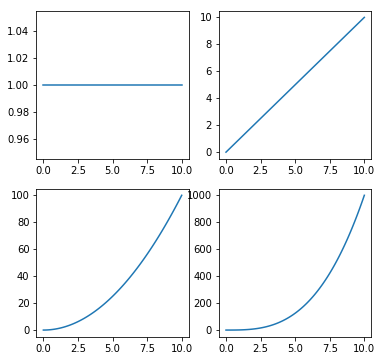

In [32]:
fig, axs = plt.subplots(2, 2, figsize=[6, 6])

x = np.linspace(0, 10, 100)
for i, ax in enumerate(axs.flatten()):
    ax.plot(x, x**i)

You'll probably notice that a lot of the labels are overlapping, which doesn't look great. You can deal with this using the *really* handy function `fig.tight_layout()`. This automatically resizes all the panels so that axis labels and legends don't overlap, and the panels make the best use of all available space in the figure. Using this command at the end of any plotting script will ensure your figures are as beautiful as possible!

**&#10148; Make the plot again, but run `fig.tight_layout()` at the end.**

In [ ]:
# Try it here!

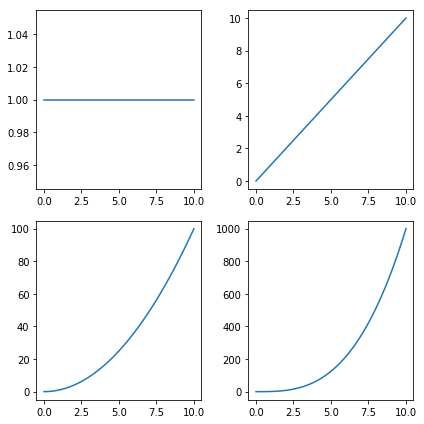

In [34]:
fig, axs = plt.subplots(2, 2, figsize=[6, 6])

x = np.linspace(0, 10, 100)
for i, ax in enumerate(axs.flatten()):
    ax.plot(x, x**i)
    
fig.tight_layout()

One final thing to notice here - all panels in this plot share the same x-axis, so plotting it on the top row isn't very space-efficient...

**&#10148; Try setting the `sharex` argument of `plt.subplots` to `True`.**

In [ ]:
# Try it here!

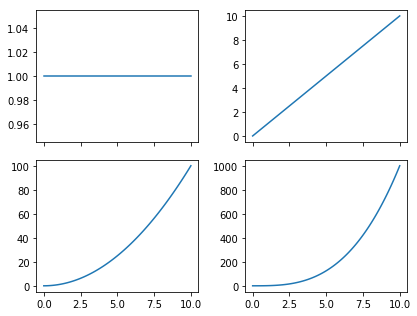

In [39]:
fig, axs = plt.subplots(2, 2, figsize=[6, 4.5], sharex=True)

x = np.linspace(0, 10, 100)
for i, ax in enumerate(axs.flatten()):
    ax.plot(x, x**i)
    
fig.tight_layout()

At this point, hopefully you're getting the idea that there are both `figure` and `axes` objects, which do quite different things. In general, actions performed on an `axis` will *only* influence that axis, while actions performed on the `figure` can influence *all* `axes` within it, or create new `axes`.

Just one final thing to complete this plot - axis labels! This is done within the `axes` objects, as the labels relate to each panel individually. The specific functions you'll need are `ax.set_xlabel()` and `ax.set_ylabel()`. `axes` objects have a wide range of `ax.set_*()` methods, which can modify their appearance. It's worth having a look at these to be aware of what's possible (type `ax.set_` and press <kbd>Tab</kbd> to see a list of possibilities).

Before you set the axis labels, there's a potential problem here - we've removed the x labels from the top row of plots... How can we deal with this? One of the benefits of using `matplotlib`'s functions for arranging axes on a plot, is that each `axis` object is 'aware' of where it is. For example, the method `ax.is_last_row()` might be useful here.

**&#10148; Within the loop, label the x axis of the bottom row with $x$, and the y-axis of every panel with $x^i$**

In [ ]:
# Try it here!

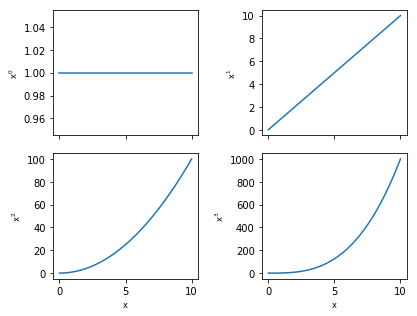

In [41]:
fig, axs = plt.subplots(2, 2, figsize=[6, 4.5], sharex=True)

x = np.linspace(0, 10, 100)
for i, ax in enumerate(axs.flatten()):
    ax.plot(x, x**i)
    if ax.is_last_row():
        ax.set_xlabel('x')
    ax.set_ylabel('$x^{:}$'.format(i))
    
fig.tight_layout()

## Review: Multi-Panel Plots

- Make a plot that is 12 inches wide and 3 inches tall containing 2 axes on the left and right, with a shared y-scale.
- Create an `x` variable with 100 points between 0 an 1.
- On the left axis, plot the function $y = \sin(5 \pi x)$ with a red line.
- On the right axis, plot the function $y = \cos(5 \pi x)$ with a blue line.
- Label the y-axis of the left panel 'y'.
- Label the x-axes of both panels 'x'

In [ ]:
# Try it here!

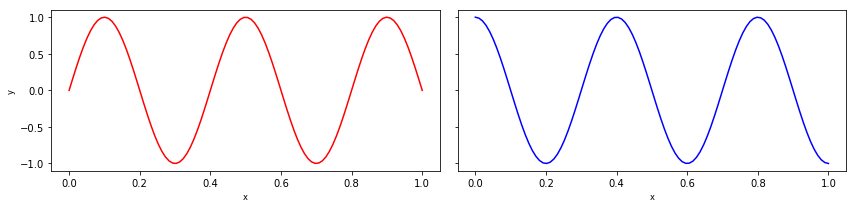

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 3], sharey=True)

x = np.linspace(0, 1, 100)
ax1.plot(x, np.sin(5 * np.pi * x), c='r')
ax2.plot(x, np.cos(5 * np.pi * x), c='b')

ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax2.set_xlabel('x')

fig.tight_layout()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Projections & Coordinate Systems

So far, we've been working in simple cartesian *(x, y)* coordinates. In science, you might come across data than needs to be represented in other coordinate systems, for example polar *(radius, angle)* coordinates.

`matplotlib` can handle different coordinate systems using the `projection` argument when creating an axis. For example:

```python
fig = plt.figure()

# create a panel with a polar projection
ax = fig.add_subplot(111, projection='polar')

# draw a spiral!
n = 1000
theta = np.linspace(0, 10 * np.pi, n)
radius = np.linspace(0, 1, n)
ax.plot(theta, radius)

# mofdify plot appearance
ax.set_theta_zero_location('N')
ax.set_rticks([])
```

Notice we're using `ax.set_theta_zero_location()` and `ax.set_rticks([])` to modify the appearance of the plot. Can you work out what these do?

**&#10148; Create a figure with two panels showing the same data. The right panel should have a polar projection.**

In [ ]:
# Try it here!

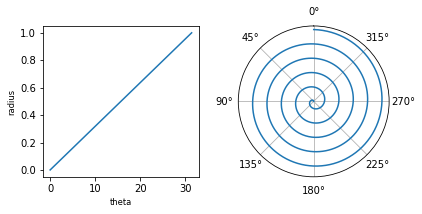

In [64]:
fig = plt.figure(figsize=[6, 3])

# create a panel with a polar projection
ax = fig.add_subplot(122, projection='polar')

# draw a spiral!
n = 1000
theta = np.linspace(0, 10 * np.pi, n)
radius = np.linspace(0, 1, n)
ax.plot(theta, radius)
ax.set_theta_zero_location('N')  # set location of 0 degrees ('North' = top)
ax.set_rticks([])  # remove radial labels

ax2 = fig.add_subplot(121)
ax2.plot(theta, radius)
ax2.set_xlabel('theta')
ax2.set_ylabel('radius')

fig.tight_layout()

## Annotations

Often, plots neet annotations to make sense. `matplotlib` has a number of tools to do this. The most useful ones are `ax.text()`, which you can use to add text to a plot, and `ax.annotate()`, which can be used to add a variety of text, arrows and other symbols.

For example:
```python
fig, ax = plt.subplots(1, 1)

xx = np.linspace(0, 2*np.pi, 1000)
ax.plot(xx,np.sin(5*xx),'b')

ax.text(3, 0, 'some text')
ax.annotate('an annotation', xy=(4, .2))
```

In [ ]:
# Try it here!

These commands have a number of other options, which alter their behaviour. The example above places the text using the same *(x,y)* coordinates as the data. If we want to place an annotation at the same position on each plot, this is impractical, and we should use *fractional coordinates* of the axis itself, instead of the data coordinates.

You can do this in both `annotate` and `text`:

```python
ax.text(.2, .2, 'some text', transform=ax.transAxes)
ax.annotate('an annotation', xy=(.6, .6), xycoords='axes fraction')
```

You might also want to change the position of this text relative to the specified coordinates. For example, you want the text 'anchored' to the *(x, y)* position on its lower left corner. Do this by specifying the `verticalalignment` and `horizontalalignment` parameters (`va` and `ha` for short).

```python
ax.text(.5, .5, 'some text', transform=ax.transAxes, ha='left', va='bottom')
ax.annotate('an annotation', xy=(.5, .5), xycoords='axes fraction', ha='right', va='top')
```

Finally, you can draw more complicated annotations using `annotate`, for example arrows with labels:

```python
ax.annotate('an arrow!', xy=(.5, .5), xytext=(.7,1.15), 
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            fontsize=12)
```

**&#10148; Create a figure with a plot of $y = x^2$, from x=-5 to x=5. Draw an arrow pointing to the minimum, with a label in the middle of the plot.**

In [ ]:
# Try it here!

Another really important type of annotation is a figure legend. `matplotlib` can automatically create legends if you specify the `label='text'` argument when drawing a line. For example:

```python
fig, ax = plt.subplots()

x = np.linspace(0, 4 * np.pi, 100)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')

ax.legend()  # this creates a figure legend
```

**&#10148; Create a plot showing $A = x$ and $B = 0.8 * x + 10$, with a figure legend.**

In [ ]:
# Try it here!

## Shared Axes

Sometimes, we may wish to plot two different datasets on the same axis, so that they share the same horizontal (or vertical) axis, but have different vertical (or horizontal) axes. To do this, matplotlib provides the `ax.twinx()` and `ax.twiny()` commands, which create a new set of axes that share the `x` or `y` axis with `ax`:

```python
fig, ax_sin = plt.subplots(1, 1)

xx = np.linspace(0, 2*np.pi, 1000)
ax_sin.plot(xx,np.sin(xx))
ax_sin.set_ylabel('sin(x)')

ax_quad = ax_sin.twinx()
ax_quad.plot(xx,xx**2,'r')
ax_quad.set_ylabel('$x^2$')
```

In [ ]:
# Try it here!

This may seem similar to the `sharex` option we passed to `plt.subplots()` earlier. The key difference is that `sharex` allowed us to create *multiple* axes that had *similar* scales; `plt.twinx()` allows us to have *one* (apparent) set of axes featuring *two* different scales.

## Real-World Data: Canberra Weather

The file `CanberraBOMweather.xls` is an Excel spreadsheet containing one year of daily weather data in Canberra, obtained from the Bureau of Meteorology. 

**&#10148; Load this data into a `pandas` dataframe**

In [ ]:
# Try it here!

In [ ]:
import pandas as pd

In [ ]:
dat = pd.read_excel('CanberraBOMweather.xls', skiprows=7)

**&#10148; Produce a plot showing daily mean temperature and pressure as a function of time.**

You should average the 9am and 3pm pressure readings for each day.

Think about the absolute values of these data - should they be on the same, or separate y axes?

In [135]:
# Try it here!

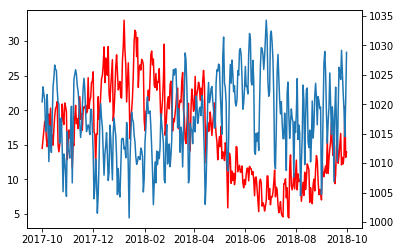

In [139]:
temp = (dat.loc[:, '9am Temperature (°C)'] + dat.loc[:, '3pm Temperature (°C)']) / 2
pres = (dat.loc[:, '9am MSL pressure (hPa)'] + dat.loc[:, '3pm MSL pressure (hPa)']) / 2

fig, ax = plt.subplots(1, 1)

ax.plot(dat.Date, temp, c='r')

pax = ax.twinx()
pax.plot(dat.Date, pres)


The function `plt.fill_between()` provides a way to shade in a region of your figure. Use this to show the maximum and minimum temperatures each day on your graph. Make sure that the mean temperature and pressure information is not obscured! (Hint: the `alpha` parameter sets the transparrency of a line)

In [ ]:
# Try it here!

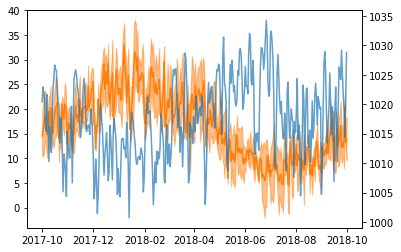

In [153]:
temp = (dat.loc[:, '9am Temperature (°C)'] + dat.loc[:, '3pm Temperature (°C)']) / 2
pres = (dat.loc[:, '9am MSL pressure (hPa)'] + dat.loc[:, '3pm MSL pressure (hPa)']) / 2

fig, ax = plt.subplots(1, 1)

ax.plot(dat.Date, temp, c='C1')

ax.fill_between(dat.loc[:, 'Date'].values, 
                dat.loc[:, '9am Temperature (°C)'].values, 
                dat.loc[:, '3pm Temperature (°C)'].values, color='C1', alpha=0.5)

pax = ax.twinx()
pax.plot(dat.Date, pres, alpha=0.7)

It's clear that temperature and pressure are correlated.

**&#10148; Produce a scatter-plot showing daily mean temperature vs. pressure.**

In [ ]:
# Try it here!

Text(0.5,0,'Temperature')

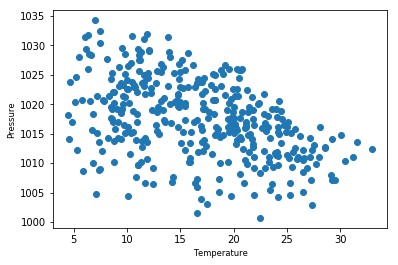

In [121]:
temp = (dat.loc[:, '9am Temperature (°C)'] + dat.loc[:, '3pm Temperature (°C)']) / 2
pres = (dat.loc[:, '9am MSL pressure (hPa)'] + dat.loc[:, '3pm MSL pressure (hPa)']) / 2

fig, ax = plt.subplots(1, 1)

ax.scatter(temp, pres)
ax.set_ylabel('Pressure')
ax.set_xlabel('Temperature')

You should see a negative correlation between Temperature and Pressure. Wind speed might also be important here... is there more of a relationship between wind and temperature, or wind and pressure? Let's have a look!

Do this by colouring the points by wind speed. (Note: before calculating the average wind speed, you'll need to replace 'Calm' with 0 in the wind speed data).

You can colour points according to a variable using the `c` parameter, for example:

```python
fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, c=z)
```

In [ ]:
# Try it here!

Text(0.5,0,'Temperature')

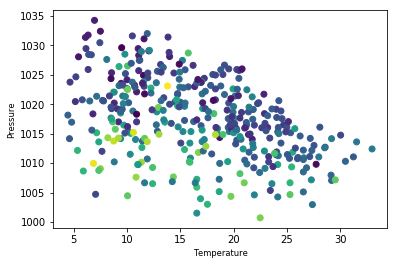

In [127]:
temp = (dat.loc[:, '9am Temperature (°C)'] + dat.loc[:, '3pm Temperature (°C)']) / 2
pres = (dat.loc[:, '9am MSL pressure (hPa)'] + dat.loc[:, '3pm MSL pressure (hPa)']) / 2

dat.replace('Calm', 0, inplace=True)
wind = (dat.loc[:, '9am wind speed (km/h)'] + dat.loc[:, '3pm wind speed (km/h)']) / 2

fig, ax = plt.subplots(1, 1)

ax.scatter(temp, pres, c=wind)
ax.set_ylabel('Pressure')
ax.set_xlabel('Temperature')

Now you need a way of telling someone what the colour means - a colour bar! This is adding a new element to the *figure*, rather than the *axis*, so you need to do this at the *figure* level (`fig.colorbar()`). Because the figure can contain multiple axes, you also need to tell the command what it's drawing the colourbar for. For example:

```python
fig, ax = plt.subplots(1, 1)
cb = ax.scatter(x, y, c=z)  # assign your coloured points to a variable
fig.colorbar(cb, label='z')
```

In [ ]:
# Try it here!

Text(0.5,0,'Temperature')

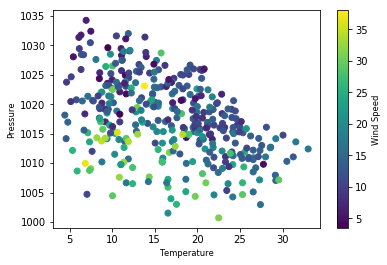

In [129]:
temp = (dat.loc[:, '9am Temperature (°C)'] + dat.loc[:, '3pm Temperature (°C)']) / 2
pres = (dat.loc[:, '9am MSL pressure (hPa)'] + dat.loc[:, '3pm MSL pressure (hPa)']) / 2

dat.replace('Calm', 0, inplace=True)
wind = (dat.loc[:, '9am wind speed (km/h)'] + dat.loc[:, '3pm wind speed (km/h)']) / 2

fig, ax = plt.subplots(1, 1)

cb = ax.scatter(temp, pres, c=wind)
fig.colorbar(cb, label='Wind Speed')

ax.set_ylabel('Pressure')
ax.set_xlabel('Temperature')